## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

### Box Plot

Text(0.5, 1.0, 'Purchase Amount by Subscription Status')

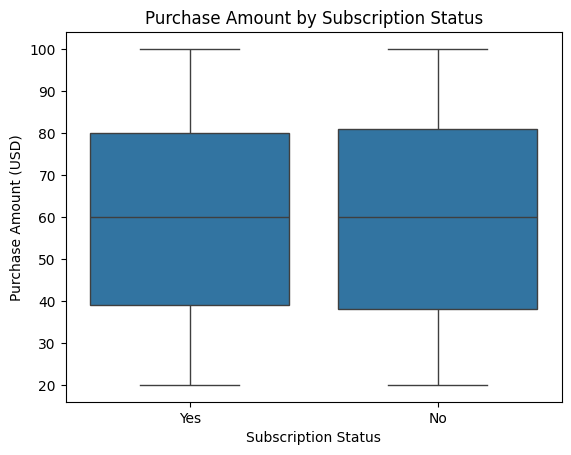

In [37]:
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Subscription Status')

**Boxplot Insights:**

Both groups show nearly identical distributions

Median purchase amount is ~$60 for both Yes and No subscribers

The boxes (Q1 to Q3) are almost the same, ranging from (~39 to ~81)$

No outliers visible in either group

### Histogram

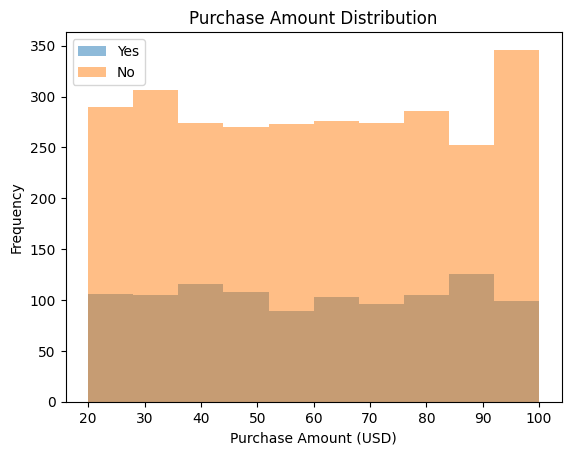

In [35]:
plt.hist(df[df['Subscription Status']=='Yes']['Purchase Amount (USD)'], bins=10, alpha=0.5, label='Yes')
plt.hist(df[df['Subscription Status']=='No']['Purchase Amount (USD)'], bins=10, alpha=0.5, label='No')
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.legend()

**Histogram Insights:**

Both groups show relatively uniform distribution across the price range (20-100)$

The frequency patterns are very similar between Yes and No subscribers

No significant spikes or gaps in the distribution

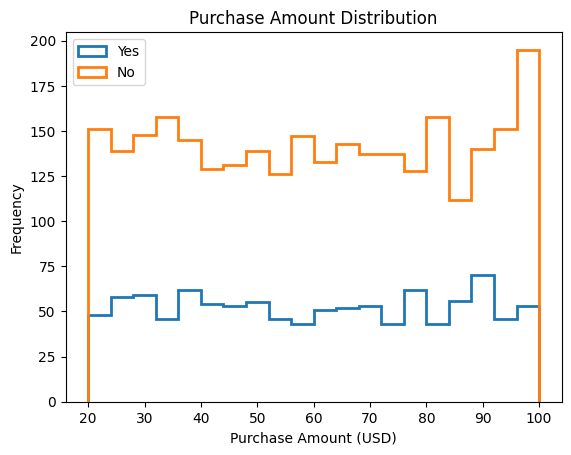

In [34]:
plt.hist(df[df['Subscription Status']=='Yes']['Purchase Amount (USD)'], bins=20, label='Yes', histtype='step', linewidth=2)
plt.hist(df[df['Subscription Status']=='No']['Purchase Amount (USD)'], bins=20, label='No', histtype='step', linewidth=2)
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.legend()

## Same as the above but this more clearer, because the upper has color overlapping

## Using Subplot

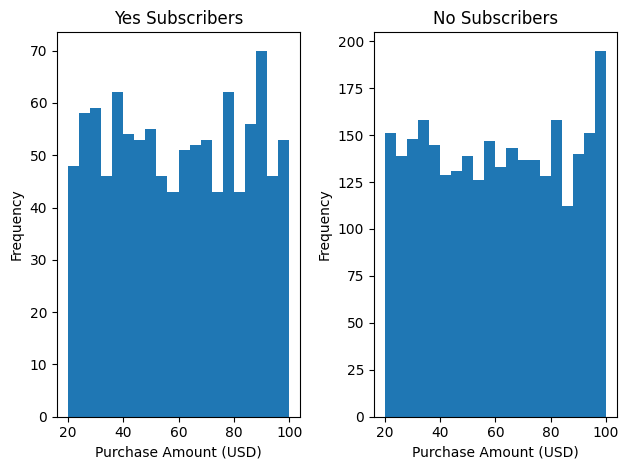

In [33]:
plt.subplot(1, 2, 1)
plt.hist(df[df['Subscription Status']=='Yes']['Purchase Amount (USD)'], bins=20)
plt.title('Yes Subscribers')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df[df['Subscription Status']=='No']['Purchase Amount (USD)'], bins=20)
plt.title('No Subscribers')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')

plt.tight_layout()

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

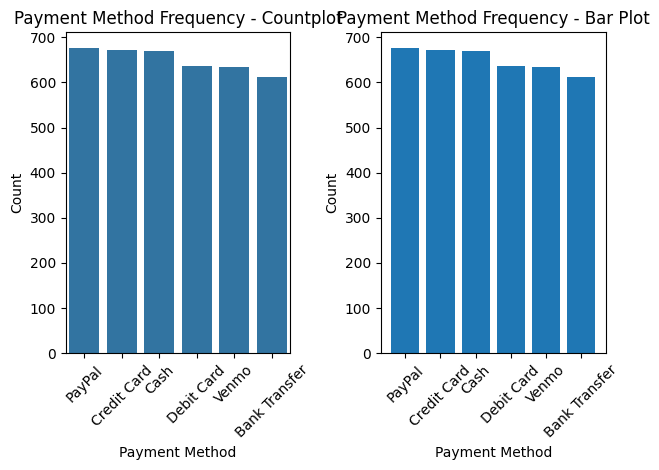

In [39]:
plt.subplot(1, 2, 1)
sns.countplot(x='Payment Method', data=df, order=df['Payment Method'].value_counts().index)
plt.title('Payment Method Frequency - Countplot')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
payment_counts = df['Payment Method'].value_counts()
plt.bar(payment_counts.index, payment_counts.values)
plt.title('Payment Method Frequency - Bar Plot')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()

**Key Insights:**

PayPal is most popular (~680 transactions) - slightly leads other methods

Very balanced distribution - All payment methods range between ~615-680 transactions

Difference between highest and lowest is only ~65 transactions

Bank Transfer is least used (~615) but still commonly used

No dominant payment method - The small differences (less than 10% variation) show customers have diverse payment preferences

Both plots show identical rankings - Confirms the data is sorted correctly from highest to lowest

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

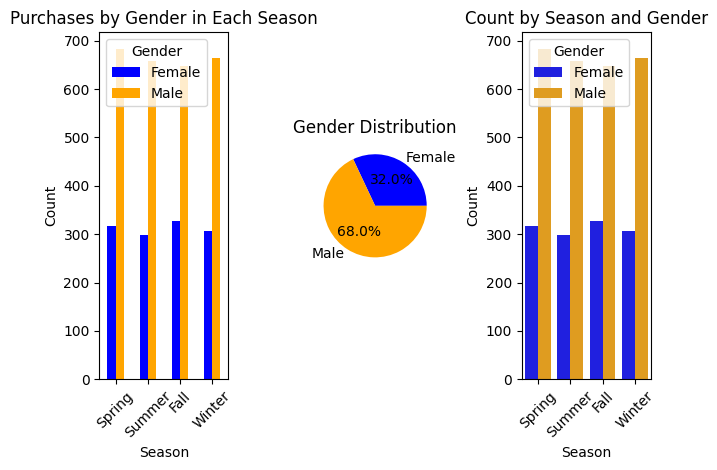

In [44]:
# Define orders
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
gender_order = ['Female', 'Male']
colors = ['blue', 'orange']

# Prepare data
gender_season = df.groupby(['Season', 'Gender']).size().unstack()
gender_season = gender_season.reindex(season_order)
gender_season = gender_season[gender_order]

# Subplot 1 (Grouped Bar Chart)
plt.subplot(1, 3, 1)
gender_season.plot(kind='bar', ax=plt.gca(), color=colors)
plt.title('Purchases by Gender in Each Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)

# Subplot 2 (Pie Chart)
plt.subplot(1, 3, 2)
gender_counts = df['Gender'].value_counts().reindex(gender_order)
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution')

# Subplot 3 (Countplot)
plt.subplot(1, 3, 3)
sns.countplot(x='Season', hue='Gender', data=df, order=season_order, hue_order=gender_order, palette=colors)
plt.title('Count by Season and Gender')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()

**Insights**

Male customers dominate - 68% male vs 32% female

Males make approximately 2x more purchases than females across all seasons

Purchases are evenly distributed across all seasons (~975 per season)

No seasonal preference by gender - the ratio stays consistent year-round

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

Text(0.5, 1.0, 'Correlation Heatmap')

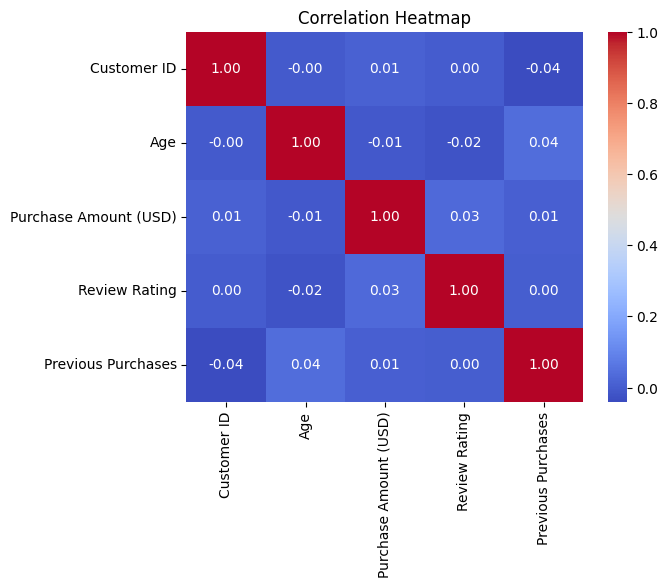

In [46]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

correlation = numeric_cols.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

**Insights**

Overall Correlation Analysis:
Most variables show very weak correlations (close to 0)

No strong relationships exist between most numeric features

The three variables are completely independent of each other - knowing one doesn't help predict the others. This suggests that customer satisfaction (rating) is not influenced by spending amount or purchase history.

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

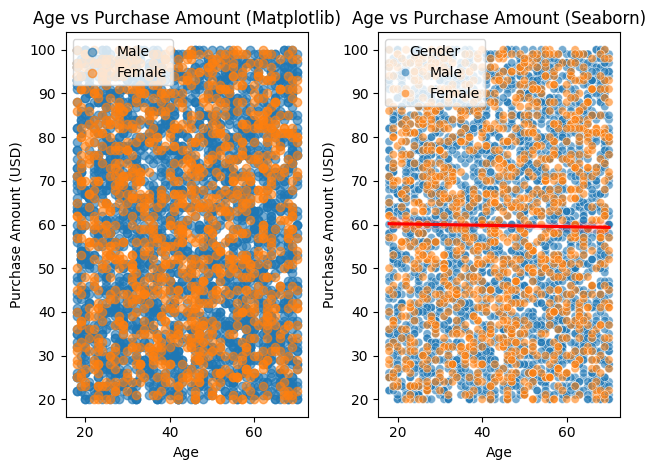

In [47]:
# Subplot 1 (Matplotlib scatter plot)
plt.subplot(1, 2, 1)
for gender in df['Gender'].unique():
    data = df[df['Gender'] == gender]
    plt.scatter(data['Age'], data['Purchase Amount (USD)'], label=gender, alpha=0.6)
plt.title('Age vs Purchase Amount (Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend()

# Subplot 2 (Seaborn with regression line)
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=df, alpha=0.6)
sns.regplot(x='Age', y='Purchase Amount (USD)', data=df, scatter=False, color='red')
plt.title('Age vs Purchase Amount (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')

plt.tight_layout()

**Insights**

No correlation between Age and Purchase Amount - the trend line is nearly flat

Purchase amounts are evenly distributed across all age groups (20-100 range)$

Both genders show similar spending patterns regardless of age

Age does not predict how much a customer will spend

The scatter shows a random distribution - younger and older customers spend similarly

No specific age group tends to make higher or lower value purchases

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

Text(50.72222222222221, 0.5, 'Category')

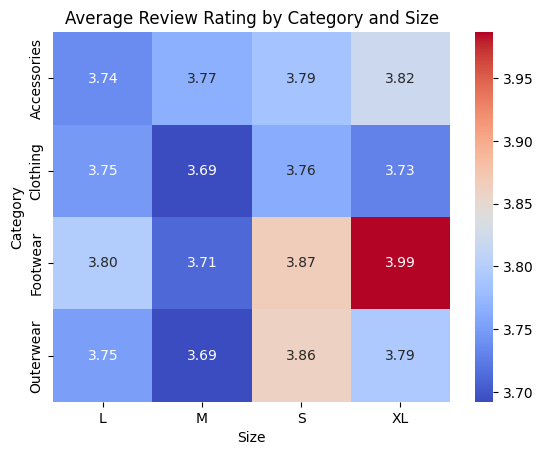

In [48]:
# Create pivot table - average review rating by Category and Size
pivot_table = df.pivot_table(values='Review Rating', index='Category', columns='Size', aggfunc='mean')

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Review Rating by Category and Size')
plt.xlabel('Size')
plt.ylabel('Category')

**Insights**

No significant difference in ratings across categories (Clothing, Footwear, Outerwear, Accessories)

Size does not affect ratings - all sizes (S, M, L, XL) receive similar ratings

Category and Size have minimal impact on how customers rate products

Average ratings are moderate (~3.7-3.8 out of 5) across all combinations

This suggests that product quality and customer satisfaction are consistent regardless of item type or size

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

<Figure size 1200x500 with 0 Axes>

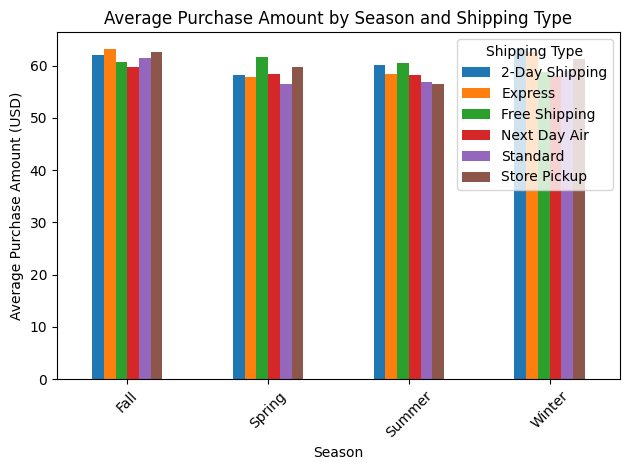

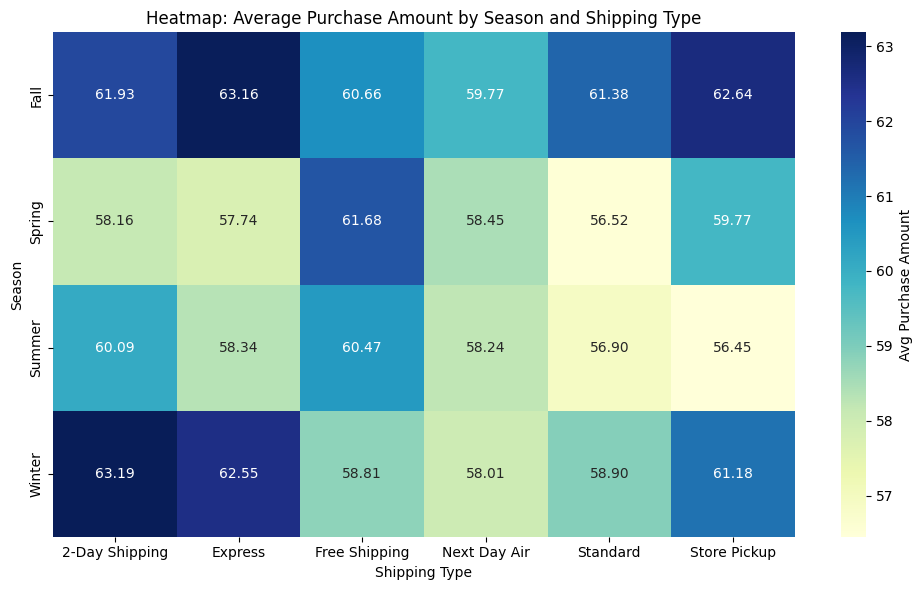

In [54]:
# Create pivot table
pivot_data = df.pivot_table(values='Purchase Amount (USD)', index='Season', columns='Shipping Type', aggfunc='mean')

# Plot 1 - Grouped Bar Chart
plt.figure(figsize=(12, 5))
pivot_data.plot(kind='bar')
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(title='Shipping Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2 - Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Avg Purchase Amount'})
plt.title('Heatmap: Average Purchase Amount by Season and Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

**Insights**

All combinations show similar average purchase amounts ~(59-60)$

No significant difference between seasons or shipping types

Shipping Type and Season do not affect spending patterns

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

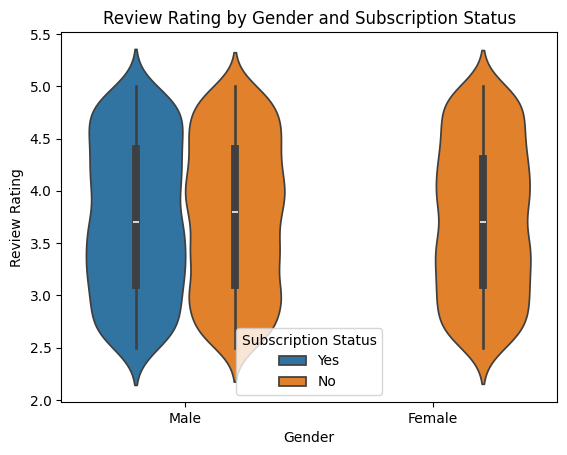

In [55]:
sns.violinplot(x='Gender', y='Review Rating', hue='Subscription Status', data=df)
plt.title('Review Rating by Gender and Subscription Status')
plt.xlabel('Gender')
plt.ylabel('Review Rating')
plt.legend(title='Subscription Status')
plt.show()

In [57]:
# Check distribution
print(df.groupby(['Gender', 'Subscription Status']).size())

Gender  Subscription Status
Female  No                     1248
Male    No                     1599
        Yes                    1053
dtype: int64


**Insights**

All female customers are non-subscribers - 0 females with subscription, 1,248 without

All subscribers are male - 100% of the 1,053 subscribers are male

Review ratings are similar across all groups - median ~3.7 for all

Subscription status and gender don't affect ratings - all groups rate products similarly

Major gap: The business has no female subscribers, indicating a potential market opportunity

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

Item Purchased
Blouse     10410
Shirt      10332
Dress      10320
Pants      10090
Jewelry    10010
Name: Purchase Amount (USD), dtype: int64


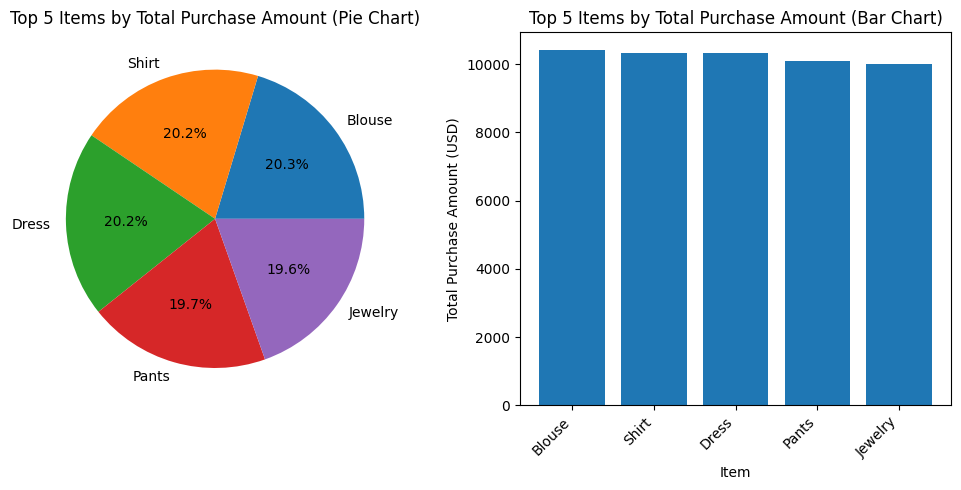

In [58]:
# Group by Item and sum purchase amounts
item_totals = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Get top 5
top5_items = item_totals.sort_values(ascending=False).head(5)
print(top5_items)

# Plot 1 - Pie Chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(top5_items.values, labels=top5_items.index, autopct='%1.1f%%')
plt.title('Top 5 Items by Total Purchase Amount (Pie Chart)')

# Plot 2 - Bar Chart
plt.subplot(1, 2, 2)
plt.bar(top5_items.index, top5_items.values)
plt.title('Top 5 Items by Total Purchase Amount (Bar Chart)')
plt.xlabel('Item')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insights**

The top 5 items contribute similarly to total revenue

All top 5 items have relatively equal total purchase amounts (differences are small)

No single item dominates sales - revenue is well distributed across items

The pie chart shows fairly balanced slices indicating diverse purchasing behavior

Each top item contributes approximately 18-22% of the top 5 total revenue

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

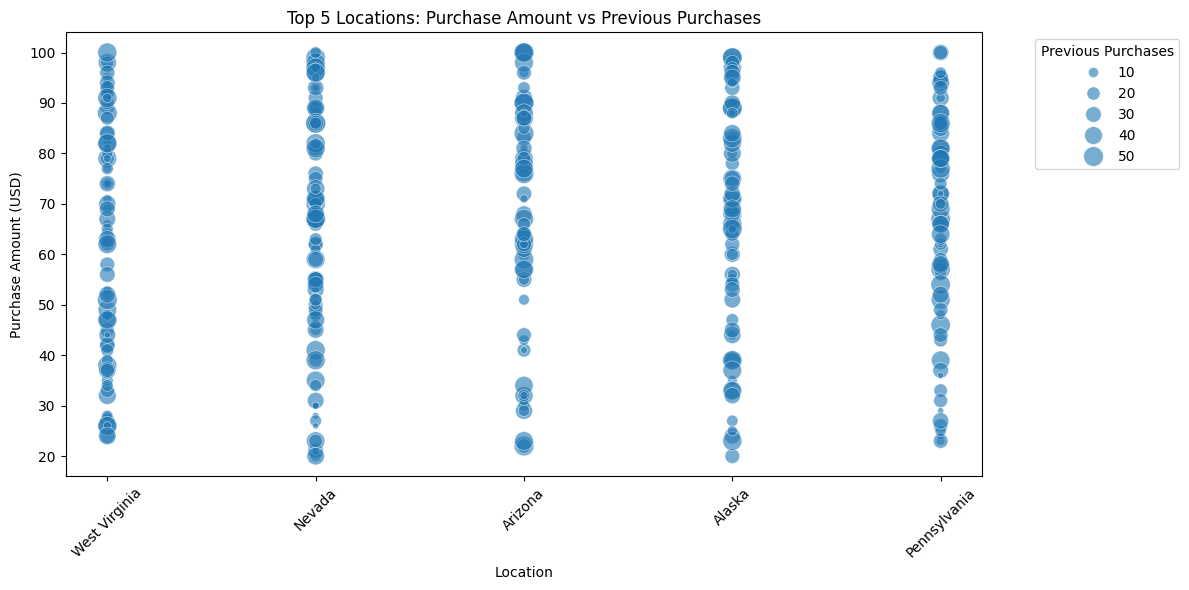

Top 5 Locations by Average Purchase Amount:
Location
Alaska           67.597222
Pennsylvania     66.567568
Arizona          66.553846
West Virginia    63.876543
Nevada           63.379310
Name: Purchase Amount (USD), dtype: float64


In [59]:
# Calculate average purchase amount by location
location_avg = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Get top 5 locations
top5_locations = location_avg.head(5).index

# Filter data for top 5 locations
top5_data = df[df['Location'].isin(top5_locations)]

# Create scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Location', y='Purchase Amount (USD)',
                size='Previous Purchases',
                data=top5_data,
                alpha=0.6,
                sizes=(20, 200))
plt.title('Top 5 Locations: Purchase Amount vs Previous Purchases')
plt.xlabel('Location')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Previous Purchases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print top 5
print("Top 5 Locations by Average Purchase Amount:")
print(location_avg.head(5))

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

Size      L     M    S   XL
Gender                     
Female  337   590  187  134
Male    716  1165  476  295


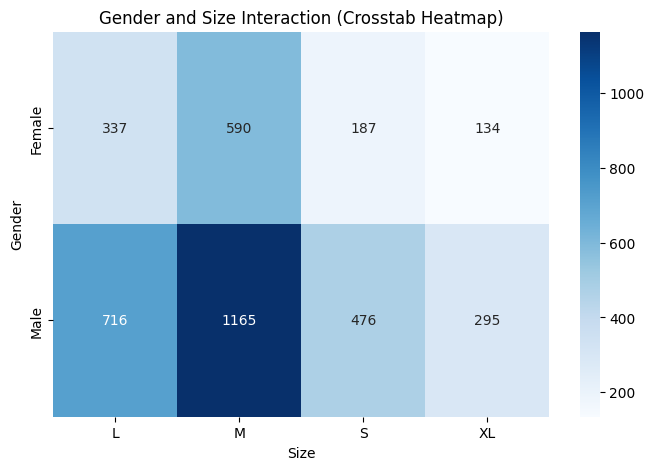

In [61]:
# Create crosstab
crosstab = pd.crosstab(df['Gender'], df['Size'])
print(crosstab)

plt.figure(figsize=(8, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Gender and Size Interaction (Crosstab Heatmap)')
plt.xlabel('Size')
plt.ylabel('Gender')
plt.show()

**Insights**

Males purchase 2x more than females across all sizes

M and L are most popular sizes for both genders

No gender-specific size preferences - both genders follow the same size distribution pattern

The male-to-female ratio (~68:32) is consistent across all sizes

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

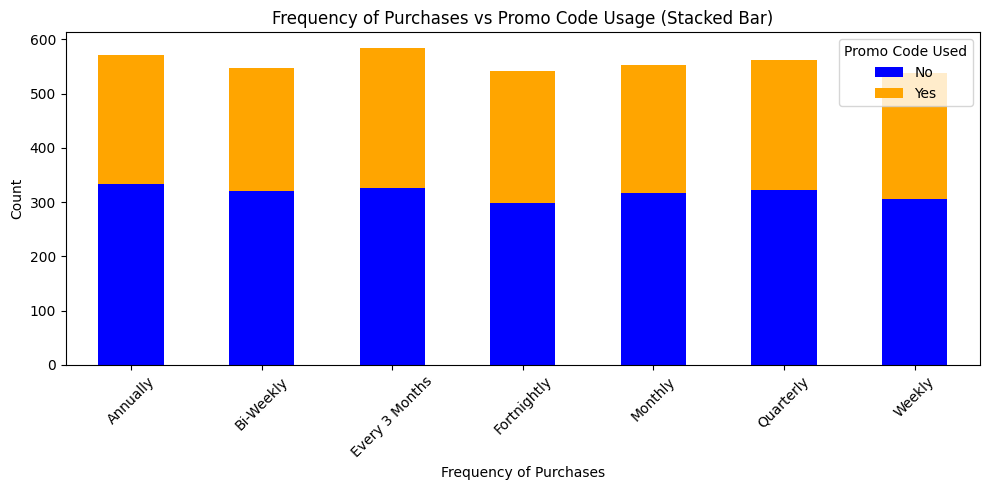

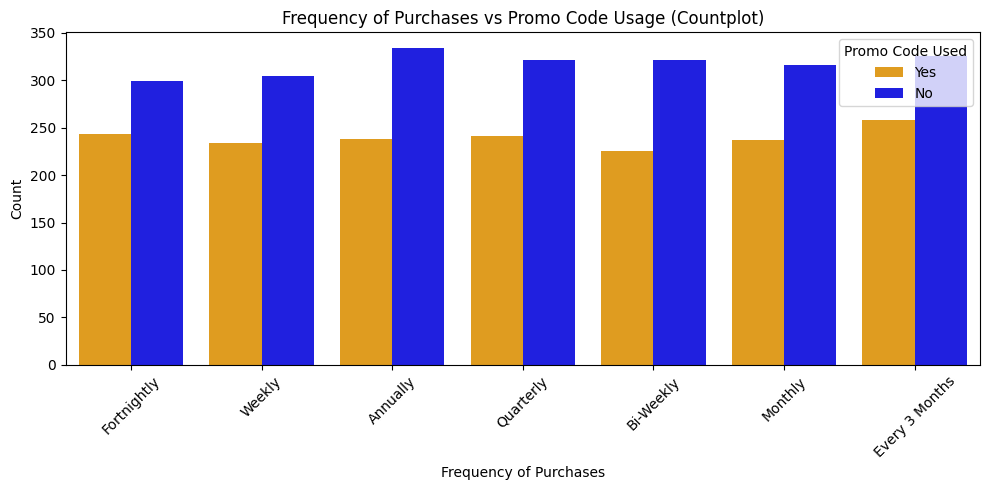

In [66]:
# Create crosstab for stacked bar chart
freq_promo = pd.crosstab(df['Frequency of Purchases'], df['Promo Code Used'])

# Define color mapping explicitly
color_map = {'No': 'blue', 'Yes': 'orange'}

# Plot 1 - Stacked Bar Chart (Matplotlib)
plt.figure(figsize=(10, 5))
freq_promo.plot(kind='bar', stacked=True, ax=plt.gca(), color=[color_map[col] for col in freq_promo.columns])
plt.title('Frequency of Purchases vs Promo Code Usage (Stacked Bar)')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.legend(title='Promo Code Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2 - Seaborn Countplot
plt.figure(figsize=(10, 5))
sns.countplot(x='Frequency of Purchases', hue='Promo Code Used', data=df, palette=color_map)
plt.title('Frequency of Purchases vs Promo Code Usage (Countplot)')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Promo Code Used')
plt.tight_layout()
plt.show()

**Insights**

Promo code usage is consistent across all purchase frequencies (~27% use, ~73% don't)

Purchase frequency does NOT influence promo code usage

The Yes:No ratio remains approximately 1:3 for all frequency groups

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

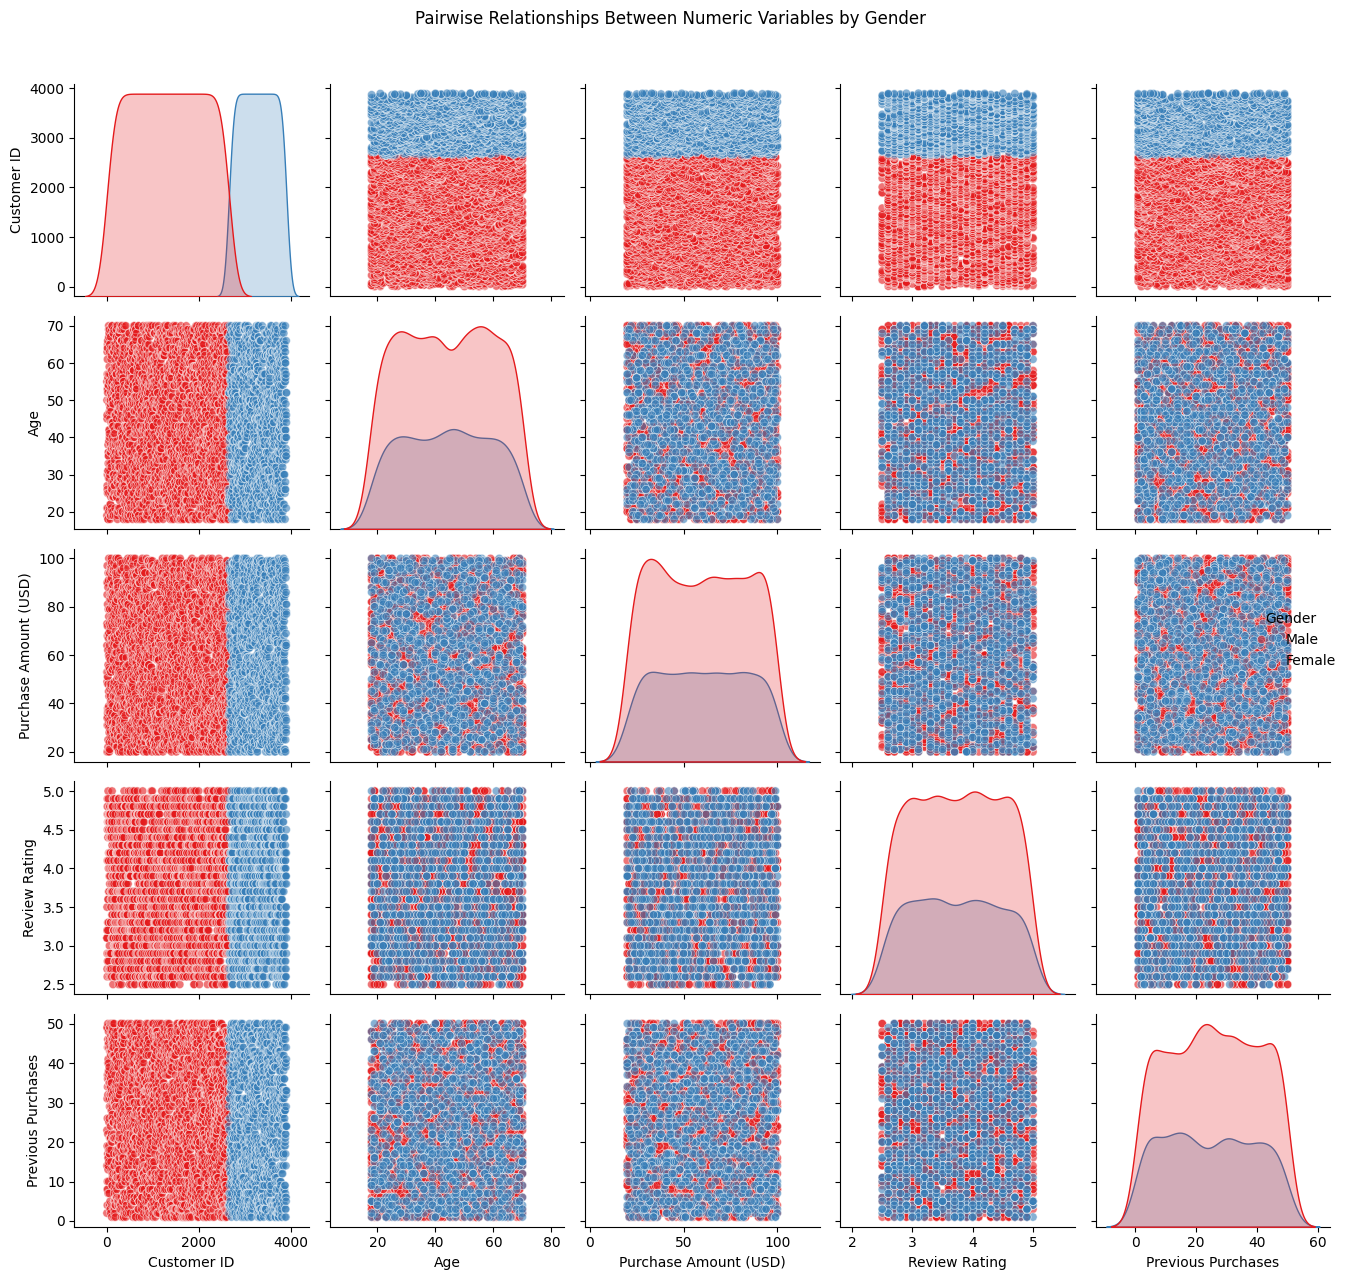

In [67]:
sns.pairplot(df, vars=numeric_cols, hue='Gender', palette='Set1', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between Numeric Variables by Gender', y=1.02)
plt.tight_layout()
plt.show()